1. Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import cv2

2. Load dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


3. Rotate an image around the center by angle degrees

In [ ]:
def rotate_image(image, angle):
    # get the image size
    image_size = (image.shape[0], image.shape[1])
    # get the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D((image_size[0]/2, image_size[1]/2), angle, 1)
    # rotate the image
    result = cv2.warpAffine(image, rotation_matrix, image_size, flags=cv2.INTER_LINEAR)
    return result

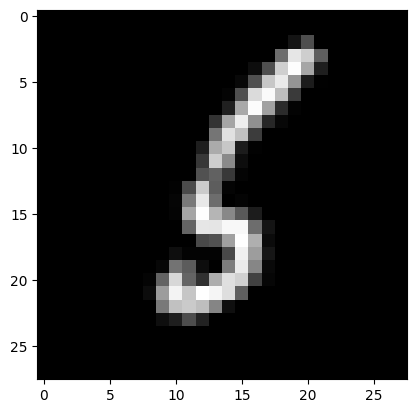

In [4]:
angle = 30  # specify the angle
image = train_images[11]  # get the 12th image (index 11)
rotated_image = rotate_image(image, angle)
plt.imshow(rotated_image, cmap='gray')
plt.show()

In [5]:
# A definition to rotate the images in the dataset by random angles and save the angle as the label
def rotate_dataset(dataset):
    # create an empty list for the rotated images
    rotated_dataset = []
    # create an empty list for the labels
    rotated_labels = []
    # loop through the images in the dataset
    for i in range(len(dataset)):
        # get the image
        image = dataset[i]
        # get a random angle
        angle = np.random.randint(0, 90)
        # rotate the image
        rotated_image = rotate_image(image, angle)
        # append the rotated image to the list
        rotated_dataset.append(rotated_image)
        # append the angle to the list
        rotated_labels.append(angle)
    # convert the lists to numpy arrays
    rotated_dataset = np.array(rotated_dataset)
    rotated_labels = np.array(rotated_labels)
    return rotated_dataset, rotated_labels


In [ ]:
# Rotate the MNIST train and test images using the function rotate_dataset
rotated_x_train, rotated_y_train = rotate_dataset(train_images)
rotated_x_test, rotated_y_test = rotate_dataset(test_images)

In [7]:
# Make sure the shapes are correct of the rotated images and labels
print(rotated_x_train.shape)
print(rotated_y_train.shape)
print(rotated_x_test.shape)
print(rotated_y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
# Normalize the training and testing data to be from 0 to 1
rotated_x_train = rotated_x_train / 255.0
rotated_x_test = rotated_x_test / 255.0

4. Construct model

In [ ]:
# CNN model
model_cnn = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression (predicting the angle)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
#ANN model
model_ann=Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5. Model summary

In [ ]:
model_cnn.summary()
model_ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,345 (474.00 KB)

 Trainable params: 121,345 (474.00 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,849 (433.00 KB)

 Trainable params: 110,849 (433.00 KB)

 Non-trainable params: 0 (0.00 B)

6. Compile models

In [ ]:
model_cnn.compile(optimizer='adam', loss='mean_absolute_error')
model_ann.compile(optimizer='adam', loss='mean_absolute_error')

7. Train models

In [ ]:
#Train CNN model
history_cnn = model_cnn.fit(rotated_x_train, rotated_y_train,
                    epochs=70, batch_size=32, validation_split=0.2)

Epoch 1/70
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 15.8695 - val_loss: 10.5097
Epoch 2/70
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 10.5067 - val_loss: 9.8194
Epoch 3/70
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 9.3108 - val_loss: 8.9222
Epoch 4/70
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 8.6112 - val_loss: 7.6865
Epoch 5/70
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 8.0244 - val_loss: 7.3206
Epoch 6/70
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 7.4645 - val_loss: 6.8712
Epoch 7/70
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 6.9794 - val_loss: 6.4078
Epoch 8/70
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 6.6260 - val_loss: 6.0746
Epoch 9/70
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 6.2969 - val_loss: 5.9522
Epoch 10/70
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 5.9698 - val_loss: 5.9164
Epoch 11/70
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 5.5916 - val_loss: 5.5777
Epoch 12/70
1500/1500 ━

In [14]:
#Train ANN model
history_ann = model_ann.fit(rotated_x_train, rotated_y_train,
                    epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 19.3207 - val_loss: 10.4106
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 11.0516 - val_loss: 9.2692
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 10.0512 - val_loss: 8.4300
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9.3433 - val_loss: 8.2029
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 8.9819 - val_loss: 7.9818
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 8.6925 - val_loss: 7.6039
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 8.4067 - val_loss: 7.4762
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 8.1976 - val_loss: 7.2548
Epoch 9/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 8.0054 - val_loss: 8.0903
Epoch 10/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7.8245 - val_loss: 7.1162
Epoch 11/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 7.6866 - val_loss: 6.8877
Epoch 12/100
750/750 ━━━━━━━━━━━━━━━━

8. Plot the training and validation loss

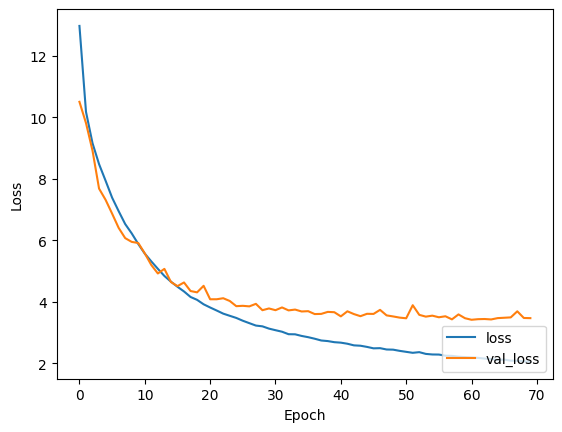

In [ ]:
# CNN model
plt.plot(history_cnn.history['loss'], label='loss')
plt.plot(history_cnn.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()


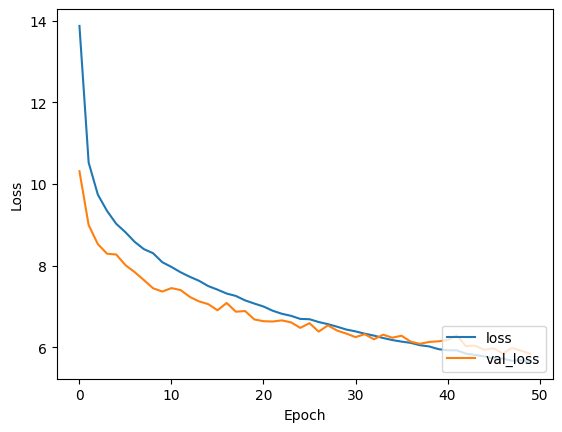

In [ ]:
#ANN model
plt.plot(history_ann.history['loss'], label='loss')
plt.plot(history_ann.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()


9. Test model

In [ ]:
#CNN model
test_loss_cnn = model_cnn.evaluate(rotated_x_test, rotated_y_test)
print("Test loss (Mean Absolute Error):", test_loss_cnn)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.5284
Test loss (Mean Absolute Error): 3.3844237327575684


In [17]:
#ANN model
test_loss_ann = model_ann.evaluate(rotated_x_test, rotated_y_test)
print("Test loss (Mean Absolute Error):", test_loss_ann)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.8569
Test loss (Mean Absolute Error): 5.506168842315674


10. Preditcion 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Image 1: Predicted angle : 42.67745590209961, Actual angle : 41 , Accuarcy:95.90864414122046
Image 2: Predicted angle : 6.5099921226501465, Actual angle : 7 , Accuarcy:92.99988746643066
Image 3: Predicted angle : 79.57572937011719, Actual angle : 82 , Accuarcy:97.04357240258193
Image 4: Predicted angle : 42.8704719543457, Actual angle : 41 , Accuarcy:95.43787328208366
Image 5: Predicted angle : 82.01480865478516, Actual angle : 77 , Accuarcy:93.487261487292
Image 6: Predicted angle : 21.788782119750977, Actual angle : 25 , Accuarcy:87.1551284790039
Image 7: Predicted angle : 15.987556457519531, Actual angle : 18 , Accuarcy:88.81975809733073
Image 8: Predicted angle : 73.79692840576172, Actual angle : 58 , Accuarcy:72.76391654179014
Image 9: Predicted angle : 15.928059577941895, Actual angle : 11 , Accuarcy:55.199458382346414
Image 10: Predicted angle : 43.785858154296875, Actual angle : 46 , Accuarcy:95.18664816151495
Image 11: Predicted angle : 67

<ipython-input-27-8958c6f3b1ea>:13: RuntimeWarning: divide by zero encountered in scalar divide
  accurcay= 100-(abs((predictions_cnn[i][0])-(rotated_y_test[i]))/rotated_y_test[i])*100


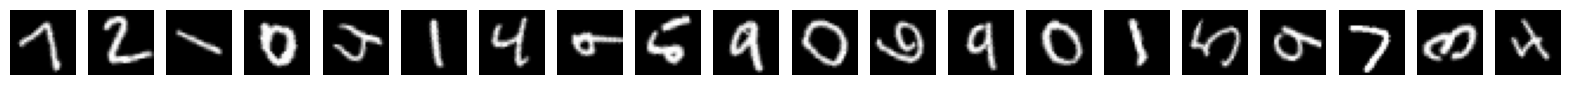

In [27]:
predictions_cnn = model_cnn.predict(rotated_x_test[:20])

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 20, figsize=(20, 2))  # 1 row, 20 columns

# Iterate through the predictions and display images
for i in range(20):
    # Display the image in the corresponding subplot
    axes[i].imshow(rotated_x_test[i], cmap='gray')
    axes[i].axis('off')  # Turn off axis labels


    accurcay= 100-(abs((predictions_cnn[i][0])-(rotated_y_test[i]))/rotated_y_test[i])*100
    print(f"Image {i + 1}: Predicted angle : {(predictions_cnn[i][0])}, Actual angle : {(rotated_y_test[i])} , Accuarcy:{accurcay}")

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Image 1: Predicted angle : 37.017269134521484, Actual angle : 41 , Accuarcy:90.28602227932069
Image 2: Predicted angle : 9.32448673248291, Actual angle : 7 , Accuarcy:66.79304667881557
Image 3: Predicted angle : 80.38720703125, Actual angle : 82 , Accuarcy:98.03317930640245
Image 4: Predicted angle : 36.61129379272461, Actual angle : 41 , Accuarcy:89.29583851884051
Image 5: Predicted angle : 71.98747253417969, Actual angle : 77 , Accuarcy:93.49022407036323
Image 6: Predicted angle : 21.263561248779297, Actual angle : 25 , Accuarcy:85.05424499511719
Image 7: Predicted angle : 17.555744171142578, Actual angle : 18 , Accuarcy:97.53191206190321
Image 8: Predicted angle : 69.31098175048828, Actual angle : 58 , Accuarcy:80.49830732674434
Image 9: Predicted angle : 4.805466651916504, Actual angle : 11 , Accuarcy:43.68606047196821
Image 10: Predicted angle : 35.9438591003418, Actual angle : 46 , Accuarcy:78.13882413117781
Image 11: Predicted angle : 67.811

<ipython-input-26-6d47fff3825d>:12: RuntimeWarning: divide by zero encountered in scalar divide
  accurcay= 100-(abs((predictions_ann[i][0])-(rotated_y_test[i]))/rotated_y_test[i])*100


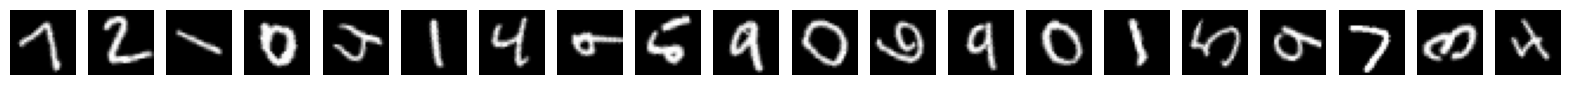

In [26]:
predictions_ann = model_ann.predict(rotated_x_test[:20])

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 20, figsize=(20, 2))  # 1 row, 20 columns

# Iterate through the predictions and display images
for i in range(20):
    # Display the image in the corresponding subplot
    axes[i].imshow(rotated_x_test[i], cmap='gray')
    axes[i].axis('off')  # Turn off axis labels

    accurcay= 100-(abs((predictions_ann[i][0])-(rotated_y_test[i]))/rotated_y_test[i])*100
    print(f"Image {i + 1}: Predicted angle : {(predictions_ann[i][0])}, Actual angle : {(rotated_y_test[i])} , Accuarcy:{accurcay}")


plt.show()